In [1]:
from autogluon.tabular import TabularDataset,TabularPredictor
import pandas as pd

In [2]:
import pandas as pd
data=pd.read_excel(r"C:\Users\Lenovo\Desktop\cctc202201108-sup-0001-si_201108si_ii.xlsx")
# data.drop(['product','reactantA','reactantB'],axis=1,inplace=True)
data

,Er,metal,surface,product,reactantA,reactantB,EA
0,-0.447,Pd,111,CH*,H*,C*,0.680
1,-0.019,Rh,111,CH*,H*,C*,0.960
2,0.031,Ru,111,CH*,H*,C*,1.030
3,-0.363,Re,111,CH*,H*,C*,1.220
4,0.424,Rh,110,CH*,H*,C*,1.350
...,...,...,...,...,...,...,...
783,1.164,Cu,111,OCCO*,CO*,CO*,1.546
784,0.115,Cu,111,OCCHO*,CO*,CHO*,0.675
785,-1.190,Cu,111,OCHCH2O*,CH2O*,CHO*,0.374
786,-1.265,Cu,111,OCH2CH2O*,CH2O*,CH2O*,0.203


In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(data,test_size=0.2)
data=TabularDataset(x_train)
data_1=TabularDataset(x_test)

In [4]:
predictor=TabularPredictor(label='EA',eval_metric='r2').fit(train_data=data)

No path specified. Models will be saved in: "AutogluonModels\ag-20230504_032555\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230504_032555\"
AutoGluon Version:  0.7.0
Python Version:     3.8.0
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    630
Train Data Columns: 6
Label Column: EA
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (7.635, -4.5, 1.33302, 1.54832)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5442.19 MB
	Train Data (Original)  Memory Usage: 0

In [5]:
predictor.leaderboard(data_1,silent=True,extra_metrics=['r2'])

,model,score_test,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.976995,0.976995,0.971140,0.054653,0.032782,58.211286,0.004988,0.000998,0.494354,2,True,12
1,CatBoost,0.970215,0.970215,0.968081,0.016955,0.009627,45.186824,0.016955,0.009627,45.186824,1,True,6
2,NeuralNetTorch,0.969797,0.969797,0.952544,0.018951,0.011966,12.523127,0.018951,0.011966,12.523127,1,True,10
3,XGBoost,0.959452,0.959452,0.868355,0.018950,0.010971,1.133648,0.018950,0.010971,1.133648,1,True,9
4,LightGBM,0.959100,0.959100,0.923415,0.017951,0.008976,0.840751,0.017951,0.008976,0.840751,1,True,4
5,ExtraTreesMSE,0.956541,0.956541,0.949863,0.095744,0.048869,0.480715,0.095744,0.048869,0.480715,1,True,7
6,LightGBMLarge,0.949119,0.949119,0.934660,0.034904,0.009974,1.271227,0.034904,0.009974,1.271227,1,True,11
7,RandomForestMSE,0.948330,0.948330,0.939050,0.114284,0.050864,0.915426,0.114284,0.050864,0.915426,1,True,5
8,LightGBMXT,0.912559,0.912559,0.904349,0.012965,0.006983,2.644678,0.012965,0.006983,2.644678,1,True,3
9,KNeighborsDist,0.892278,0.892278,0.909587,0.013759,0.010190,0.006981,0.013759,0.010190,0.006981,1,True,2


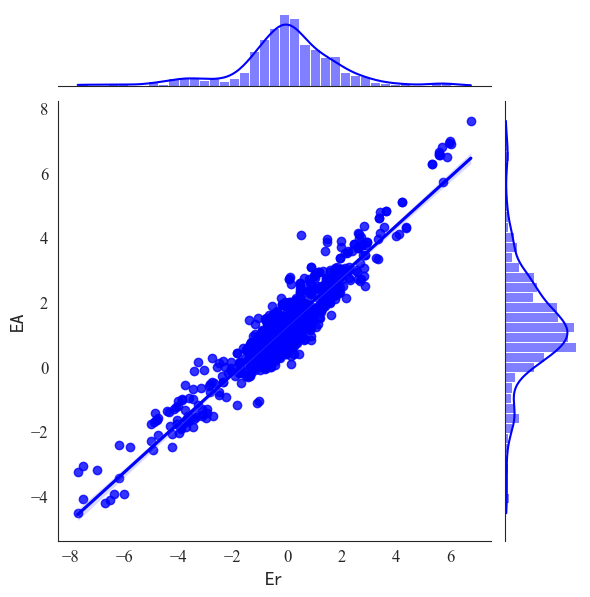

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_excel(r"C:\Users\Lenovo\Desktop\cctc202201108-sup-0001-si_201108si_ii.xlsx")
sns.set_style("white",{"font.sans-serif":['simhei','Droid Sans Fallback']})
sns.jointplot(x="Er",y="EA",data=data,kind='reg',color='b')
plt.xlabel('Er',fontsize=14)
plt.ylabel('EA',fontsize=14)
plt.xticks(fontsize=12,fontname='Times New Roman')
plt.yticks(fontsize=12,fontname='Times New Roman')
plt.show()

In [6]:
from autogluon.tabular import TabularDataset,TabularPredictor
import pandas as pd
data=pd.read_csv('data_use.csv')
data['Ea']=data['Ea'].fillna(900)
find=data[(data.Ea==900)].index.to_list()
len(find)
data=data.drop(find)

In [7]:
from sklearn.model_selection import train_test_split
# from sklearn.impute import KNNImputer
# imputer=KNNImputer(n_neighbors=5)
# Ea_1=imputer.fit_transform(data['Ea'].to_numpy().reshape(-1,1))
# data['Ea']=Ea_1
# data=data.drop(columns=['metal'])
data=data.drop('Unnamed: 0',axis=1)
# data=data.drop('Ea',axis=1)
data

,Ag,Au,Co,Ir,Ni,Os,Pd,Pt,Re,Rh,...,CH3CHCH3,CH3CHCH3*.1,H*,X,r,E,M,rou,Er,Ea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.78,0.30
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.66,0.36
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.58,0.36
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.23,0.41
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.52,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0.118312,0.080695,1.269763,0.997391,1.230796,0.09,0.80
171,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0.118312,0.080695,1.269763,0.997391,1.230796,0.05,0.82
172,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0.118312,0.080695,1.269763,0.997391,1.230796,0.43,1.02
173,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0.118312,0.080695,1.269763,0.997391,1.230796,0.35,1.03


In [8]:

x_train,x_test=train_test_split(data,test_size=0.2,random_state=0)
data=TabularDataset(x_train)
data_1=TabularDataset(x_test)

In [9]:
predictor=TabularPredictor(label='Ea',eval_metric='r2').fit(train_data=data)

No path specified. Models will be saved in: "AutogluonModels\ag-20230504_032708\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230504_032708\"
AutoGluon Version:  0.7.0
Python Version:     3.8.0
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    140
Train Data Columns: 47
Label Column: Ea
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.5, 0.01, 0.69343, 0.36856)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5111.04 MB
	Train Data (Original)  Memory Usage: 0.

In [10]:
predictor.leaderboard(data_1,silent=True,extra_metrics=['mae'])

,model,score_test,mean_absolute_error,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestMSE,0.697075,-0.135744,0.868128,0.085770,0.051860,0.514627,0.085770,0.051860,0.514627,1,True,5
1,WeightedEnsemble_L2,0.690789,-0.137689,0.870200,0.115690,0.068815,3.418084,0.005984,0.000000,0.554154,2,True,12
2,NeuralNetFastAI,0.667939,-0.132959,0.664080,0.019947,0.010972,1.572668,0.019947,0.010972,1.572668,1,True,8
3,ExtraTreesMSE,0.657864,-0.136023,0.824315,0.069813,0.055850,0.636953,0.069813,0.055850,0.636953,1,True,7
4,CatBoost,0.648357,-0.141415,0.846917,0.009974,0.004987,2.339335,0.009974,0.004987,2.339335,1,True,6
5,LightGBMLarge,0.634423,-0.149818,0.830517,0.009973,0.002992,0.787384,0.009973,0.002992,0.787384,1,True,11
6,NeuralNetTorch,0.613973,-0.141447,0.729213,0.015958,0.007980,0.760966,0.015958,0.007980,0.760966,1,True,10
7,LightGBMXT,0.602514,-0.166062,0.698019,0.006986,0.003988,0.774872,0.006986,0.003988,0.774872,1,True,3
8,LightGBM,0.545832,-0.182394,0.618167,0.004982,0.000998,0.563508,0.004982,0.000998,0.563508,1,True,4
9,XGBoost,0.543116,-0.156057,0.832069,0.019946,0.003990,0.643843,0.019946,0.003990,0.643843,1,True,9


In [11]:
data=pd.read_csv('try.csv')
data['Ea']=data['Ea'].fillna(900)
find=data[(data.Ea==900)].index.to_list()
len(find)
data=data.drop(find)
data=data.drop('Unnamed: 0',axis=1)
data=data.drop('Er',axis=1)
data
pd1=pd.DataFrame(predictor.predict(data))

KeyError: "9 required columns are missing from the provided dataset to transform using AutoMLPipelineFeatureGenerator. 9 missing columns: ['Ir', 'Ni', 'Os', 'Pd', 'Pt', 'Re', 'Rh', 'Ru', 'Er'] | 36 available columns: ['111', '211', 'CH3CCH', 'CH3CCH*', 'CH3CCH2*', 'CH3CCH3*', 'CH3CH2C*', 'CH3CH2CH*', 'CH3CH2CH2*', 'CH3CH2CH3', 'CH3CH2CH3*', 'CH3CHC*', 'CH3CHCH*', 'CH3CHCH2', 'CH3CHCH2*', 'CH3CHCH3*', 'CH3CC*', 'CH3CCH*.1', 'CH3CCH2*.1', 'CH3CCH3*.1', 'CH3CH2C*.1', 'CH3CH2CH*.1', 'CH3CH2CH2*.1', 'CH3CH2CH3*.1', 'CH3CHC*.1', 'CH3CHCH*.1', 'CH3CHCH2*.1', 'CH3CHCH3', 'CH3CHCH3*.1', 'H*', 'X', 'r', 'E', 'M', 'rou', 'Ea']"

In [ ]:
pd2=pd.concat([data,pd1],axis=1)
pd2

,111,211,CH3CCH,CH3CCH*,CH3CCH2*,CH3CCH3*,CH3CH2C*,CH3CH2CH*,CH3CH2CH2*,CH3CH2CH3,...,CH3CHCH3,CH3CHCH3*.1,H*,X,r,E,M,rou,Ea,Er
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0.180776,-0.304848,-1.078164,-0.714507,-0.692395,0.01,-0.413528
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0.180776,0.080695,1.269763,0.997391,1.230873,0.03,-0.739204
2,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0.180776,-0.112076,0.682782,0.959247,1.259693,0.04,-0.243834
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0.634694,-0.304848,-1.078164,-0.714507,-0.692395,0.05,-0.604311
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0.180776,-0.304848,-1.078164,-0.714507,-0.692395,0.05,0.037967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0.180776,-0.304848,-1.078164,-0.714507,-0.692395,0.05,0.037967
171,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0.180776,-0.304848,-1.078164,-0.714507,-0.692395,0.25,0.032978
172,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0.180776,-0.304848,-1.078164,-0.714507,-0.692395,0.08,0.028236
173,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0.180776,-0.304848,-1.078164,-0.714507,-0.692395,0.78,0.631602


In [ ]:
x_train,x_test=train_test_split(pd2,test_size=0.2,random_state=0)
data=TabularDataset(x_train)
data_1=TabularDataset(x_test)

In [ ]:
predictor=TabularPredictor(label='Ea',eval_metric='r2').fit(train_data=data)

No path specified. Models will be saved in: "AutogluonModels\ag-20230419_072857\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230419_072857\"
AutoGluon Version:  0.7.0
Python Version:     3.8.0
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    140
Train Data Columns: 36
Label Column: Ea
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.5, 0.01, 0.68379, 0.35643)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5869.16 MB
	Train Data (Original)  Memory Usage: 0.

In [ ]:
predictor.leaderboard(data_1,silent=True,extra_metrics=['mae'])

,model,score_test,mean_absolute_error,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesMSE,0.767959,-0.144387,0.301923,0.066823,0.054852,0.571966,0.066823,0.054852,0.571966,1,True,7
1,CatBoost,0.744431,-0.134417,0.506636,0.015957,0.004985,180.148309,0.015957,0.004985,180.148309,1,True,6
2,WeightedEnsemble_L2,0.742317,-0.147876,0.545751,0.051857,0.029921,183.370185,0.004987,0.001002,0.431846,2,True,12
3,RandomForestMSE,0.720883,-0.158622,0.322220,0.076795,0.027924,0.337099,0.076795,0.027924,0.337099,1,True,5
4,LightGBM,0.717303,-0.147529,0.368129,0.002991,0.001994,0.638292,0.002991,0.001994,0.638292,1,True,4
5,LightGBMLarge,0.706954,-0.150592,0.365444,0.014960,0.002992,1.182765,0.014960,0.002992,1.182765,1,True,11
6,XGBoost,0.701215,-0.155778,0.353382,0.015916,0.004986,1.166879,0.015916,0.004986,1.166879,1,True,9
7,KNeighborsDist,0.688497,-0.157184,0.275377,0.008976,0.007978,0.004987,0.008976,0.007978,0.004987,1,True,2
8,NeuralNetFastAI,0.671987,-0.156262,0.366186,0.015955,0.013962,1.546356,0.015955,0.013962,1.546356,1,True,8
9,NeuralNetTorch,0.600496,-0.191309,0.419833,0.014959,0.009972,1.243674,0.014959,0.009972,1.243674,1,True,10
